# Climate data Time Series analysis

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\climate_data (2).csv', usecols=[0,1,2,3,4,5,6,7,8,9], engine='python',header = None)
df

,0,1,2,3,4,5,6,7,8,9
0,Date,Average temperature (Â°F),Average humidity (%),Average dewpoint (Â°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (Â°deg),Rainfall for month (in),Rainfall for year (in)
1,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0
2,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0
3,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0
4,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3898,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38
3899,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47
3900,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47
3901,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47


In [3]:
df.dropna( axis=0,how='any')

,0,1,2,3,4,5,6,7,8,9
0,Date,Average temperature (Â°F),Average humidity (%),Average dewpoint (Â°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (Â°deg),Rainfall for month (in),Rainfall for year (in)
1,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0
2,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0
3,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0
4,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3898,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38
3899,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47
3900,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47
3901,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47


In [4]:
df.isnull().any()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [5]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [6]:
df.rename(columns={'Average temperature (Â°F)' : 'avgtemp'},inplace=True)
df.rename(columns={'Average humidity (%)' : 'avghumid'},inplace=True)
df.rename(columns={'Average dewpoint (Â°F)' : 'avgdew'},inplace=True)
df.rename(columns={'Average barometer (in)' : 'augbaro'},inplace=True)
df.rename(columns={'Average windspeed (mph)' : 'augwind'},inplace=True)
df.rename(columns={'Average gustspeed (mph)' : 'avggust'},inplace=True)
df.rename(columns={'Average direction (Â°deg)' : 'avgdir'},inplace=True)
df.rename(columns={'Rainfall for month (in)' : 'rfm'},inplace=True)
df.rename(columns={'Rainfall for year (in)' : 'rfy'},inplace=True)

In [7]:
df.columns = ['Date','avgtemp','avghumid','avgdew','augbaro','augwind','avggust','avgdir','rfm','rfy']

In [8]:
df.describe()

,Date,avgtemp,avghumid,avgdew,augbaro,augwind,avggust,avgdir,rfm,rfy
count,3903,3903,3903,3903,3903,3903,3903,3903,3903,3903
unique,3903,657,87,639,23,207,333,330,235,800
top,2018-03-29,46.9,51.0,15.7,29.8,2.3,3.9,282.0,0.0,0.0
freq,1,17,99,18,715,85,60,236,549,117


In [9]:
df.shape

(3903, 10)

In [10]:
df.dtypes

Date        object
avgtemp     object
avghumid    object
avgdew      object
augbaro     object
augwind     object
avggust     object
avgdir      object
rfm         object
rfy         object
dtype: object

In [11]:
# Data Preprocessing and Visualization

In [12]:
df.columns

Index(['Date', 'avgtemp', 'avghumid', 'avgdew', 'augbaro', 'augwind', 'avggust', 'avgdir', 'rfm', 'rfy'], dtype='object')

In [13]:
cols = ['avgtemp', 'avghumid', 'avgdew', 'augbaro', 'augwind', 'avggust', 'avgdir', 'rfm', 'rfy']
df[cols] = df[cols].apply(pd.to_numeric,errors='coerce')

In [14]:
import pandas as pd
df['Date']= pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3902 non-null   datetime64[ns]
 1   avgtemp   3902 non-null   float64       
 2   avghumid  3902 non-null   float64       
 3   avgdew    3902 non-null   float64       
 4   augbaro   3902 non-null   float64       
 5   augwind   3902 non-null   float64       
 6   avggust   3902 non-null   float64       
 7   avgdir    3902 non-null   float64       
 8   rfm       3902 non-null   float64       
 9   rfy       3902 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 305.0 KB


In [15]:
y = df.set_index('Date')

In [16]:
y.index

DatetimeIndex([       'NaT', '2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04', '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08', '2009-01-09',
               ...
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28'], dtype='datetime64[ns]', name='Date', length=3903, freq=None)

In [18]:
y.drop(y.head(1).index,inplace=True)

In [19]:
y.isnull().any()

avgtemp     False
avghumid    False
avgdew      False
augbaro     False
augwind     False
avggust     False
avgdir      False
rfm         False
rfy         False
dtype: bool

In [20]:
y.isnull().sum()

avgtemp     0
avghumid    0
avgdew      0
augbaro     0
augwind     0
avggust     0
avgdir      0
rfm         0
rfy         0
dtype: int64

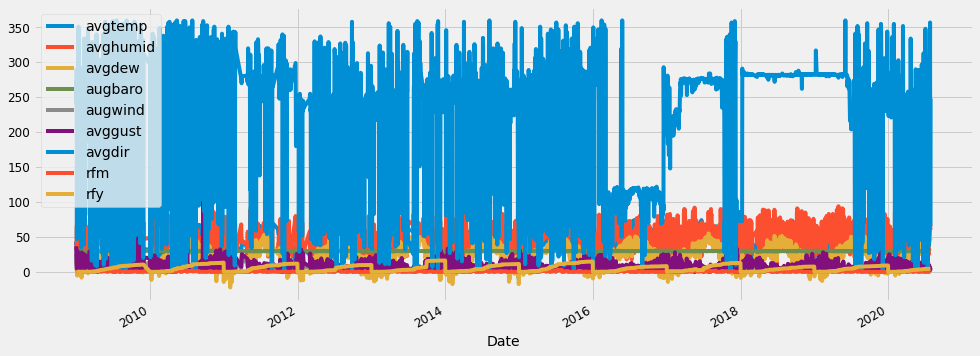

In [21]:
y.plot(figsize=(15, 6))
plt.show()

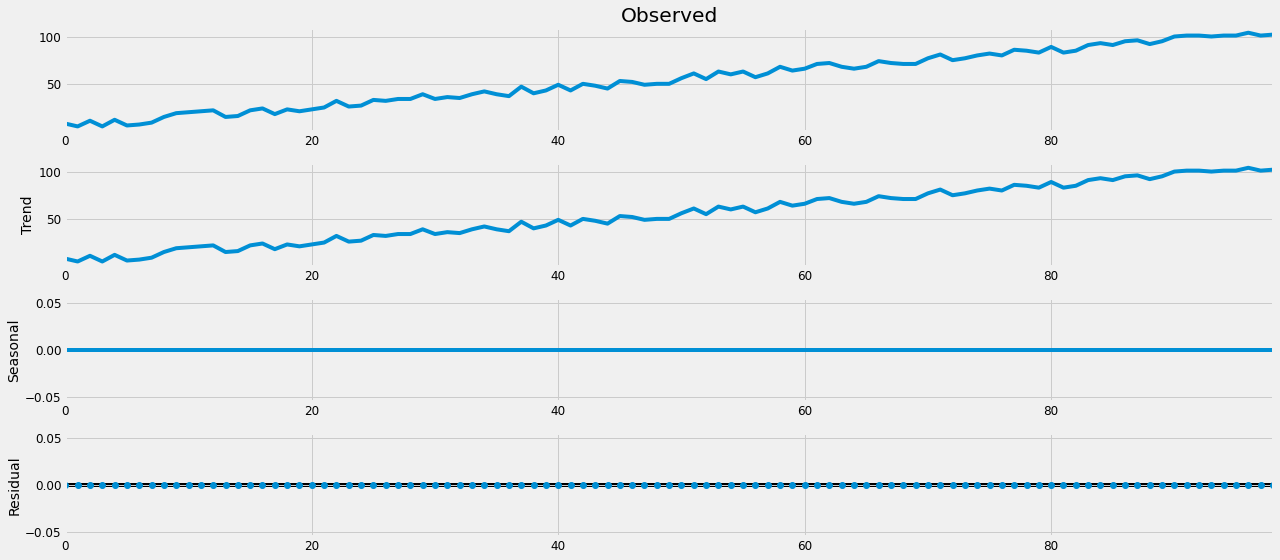

In [25]:

from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

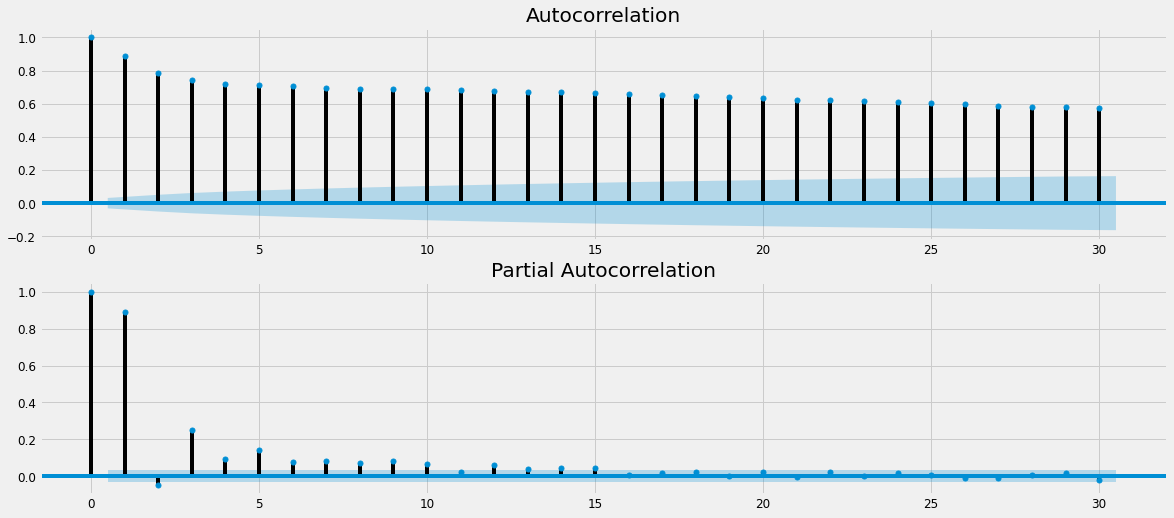

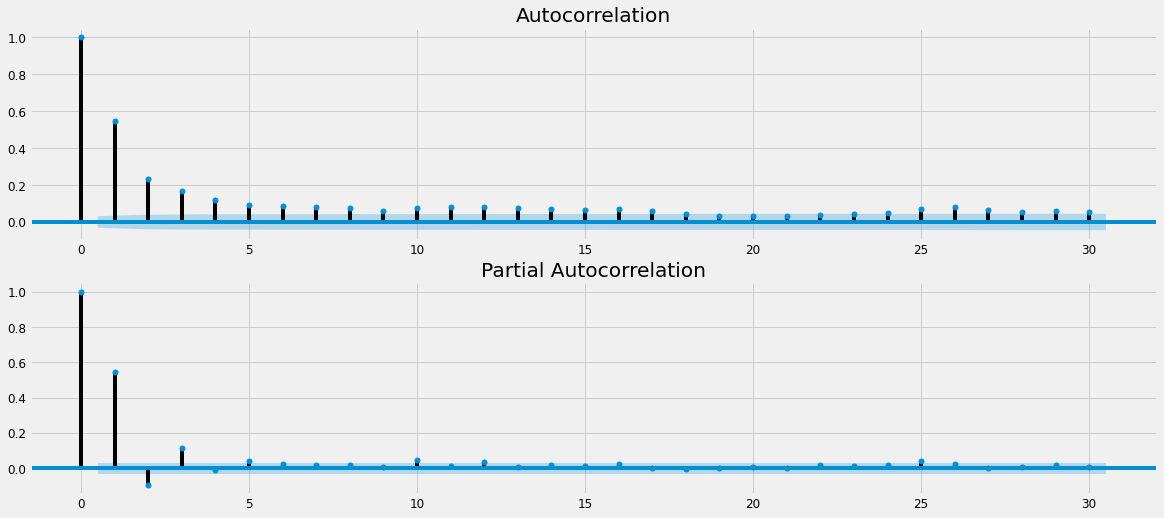

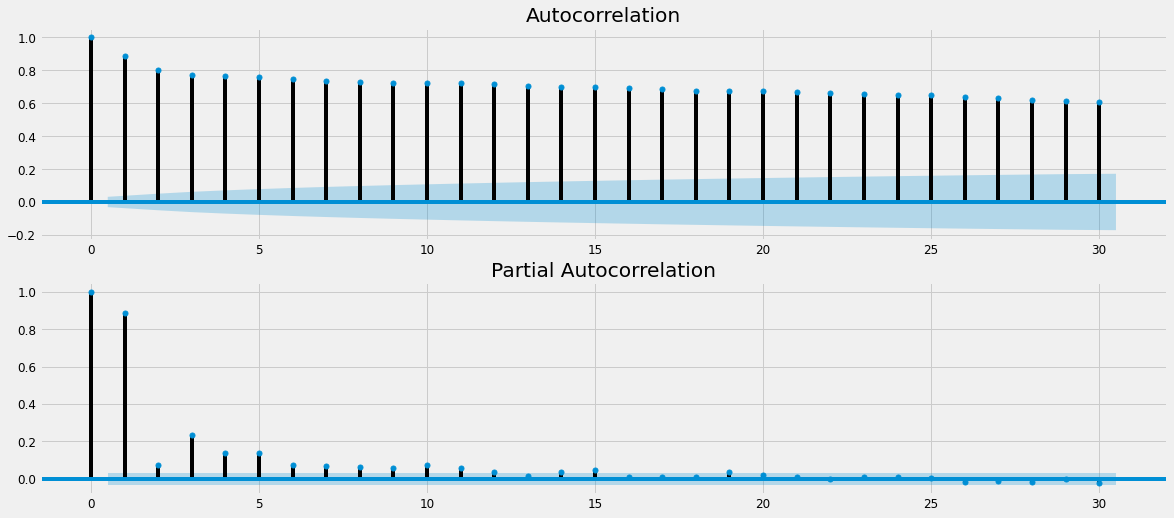

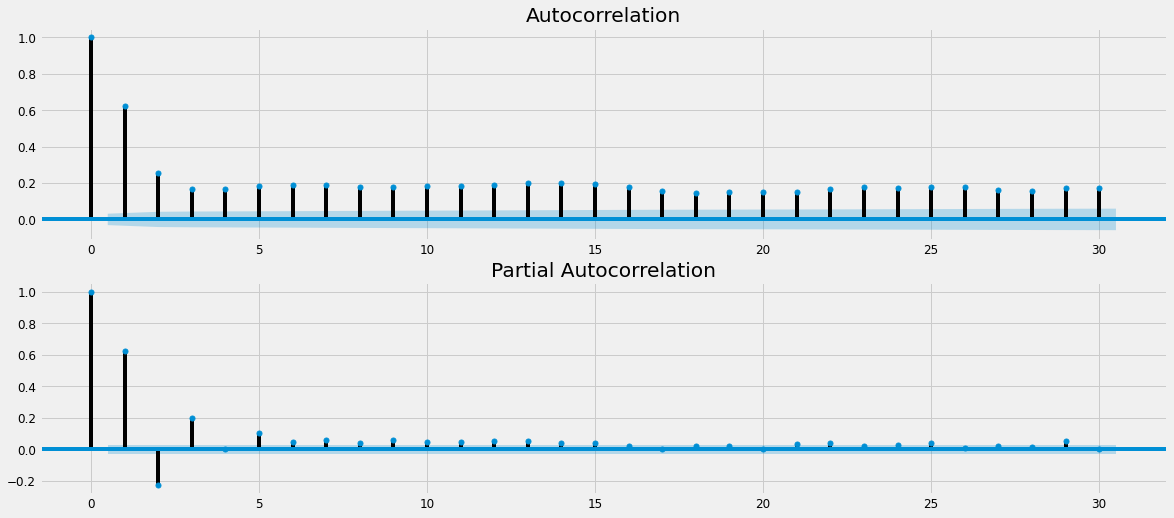

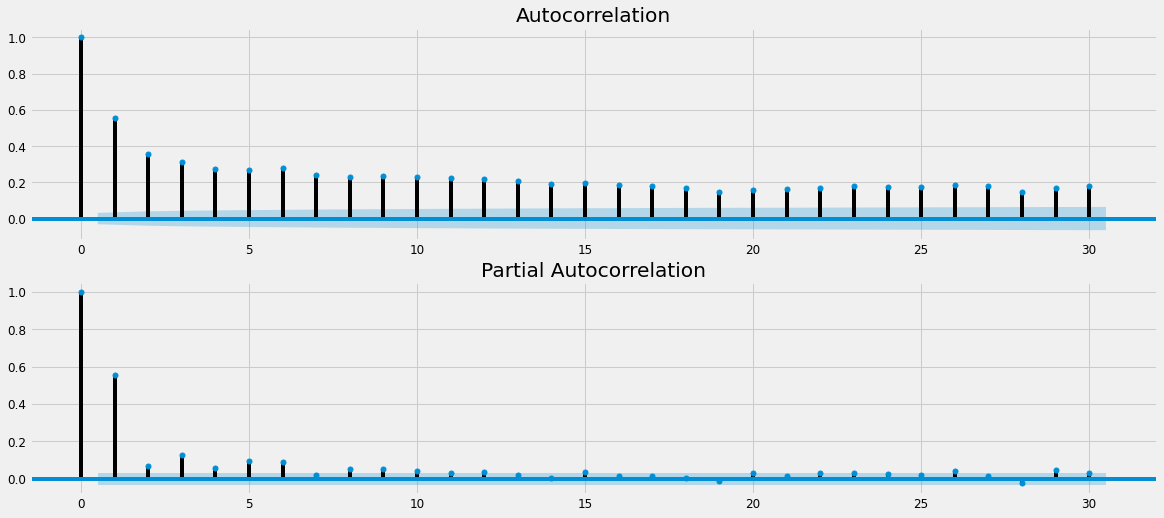

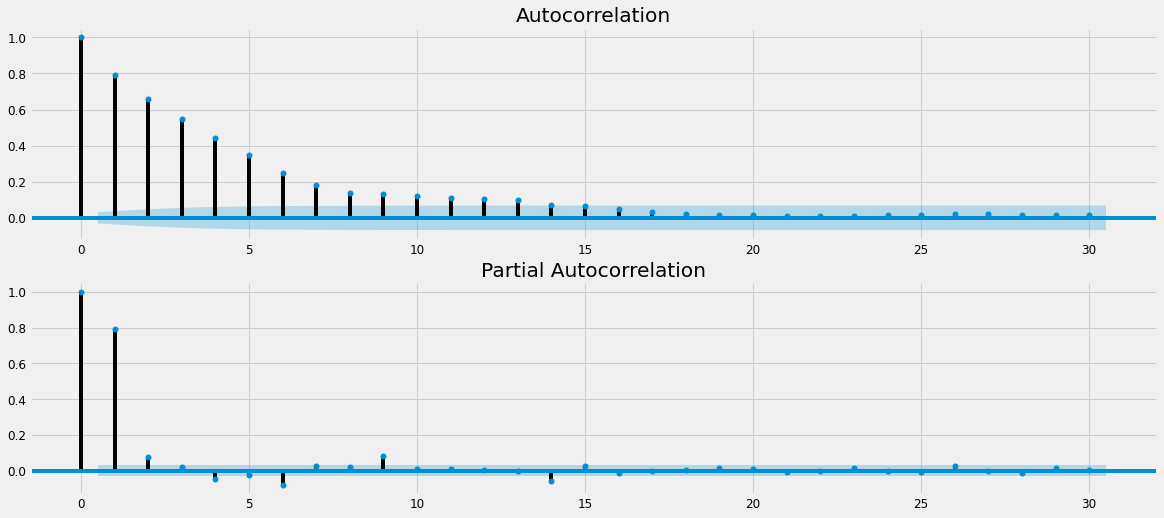

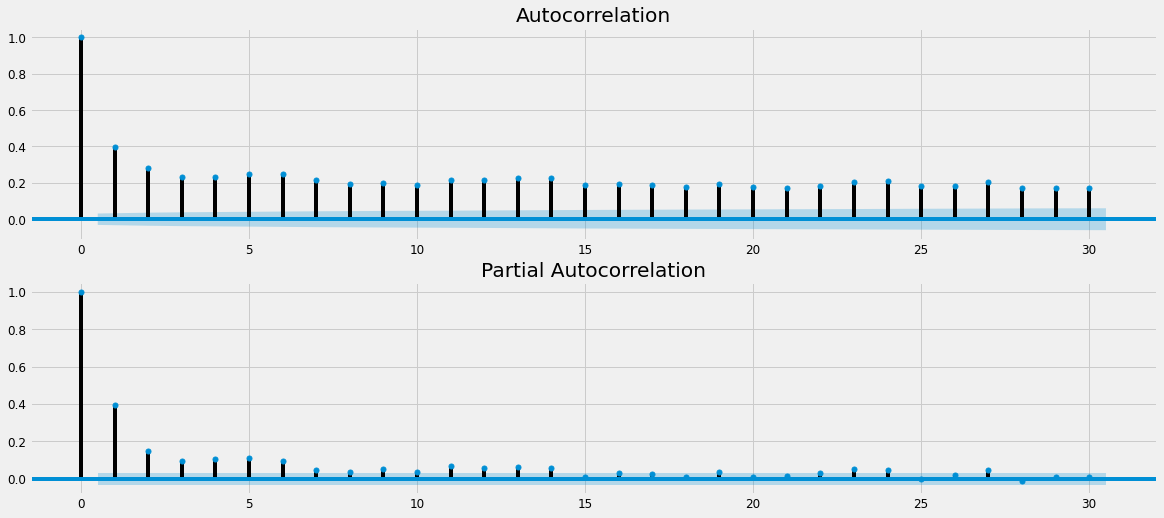

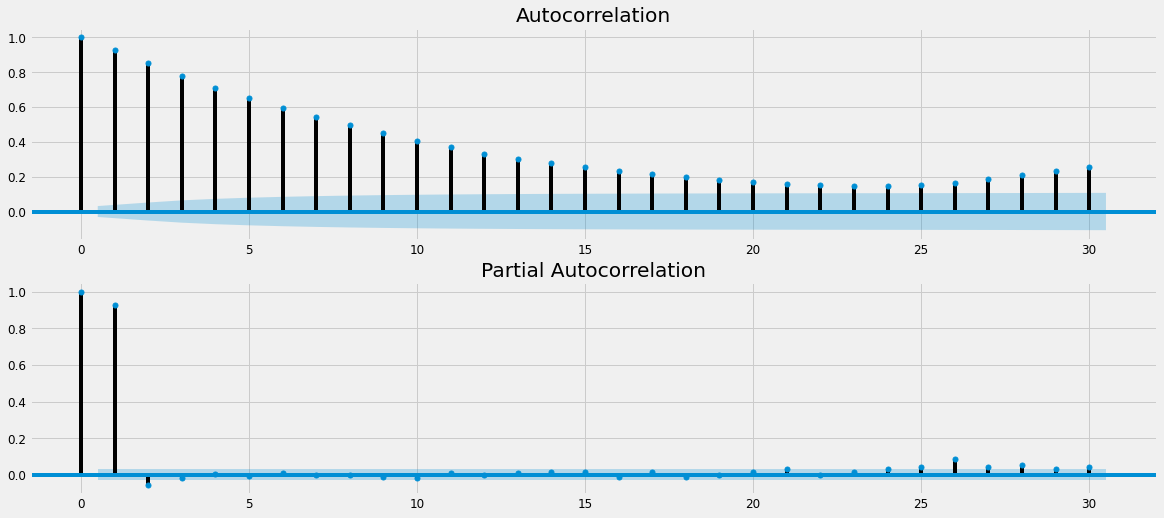

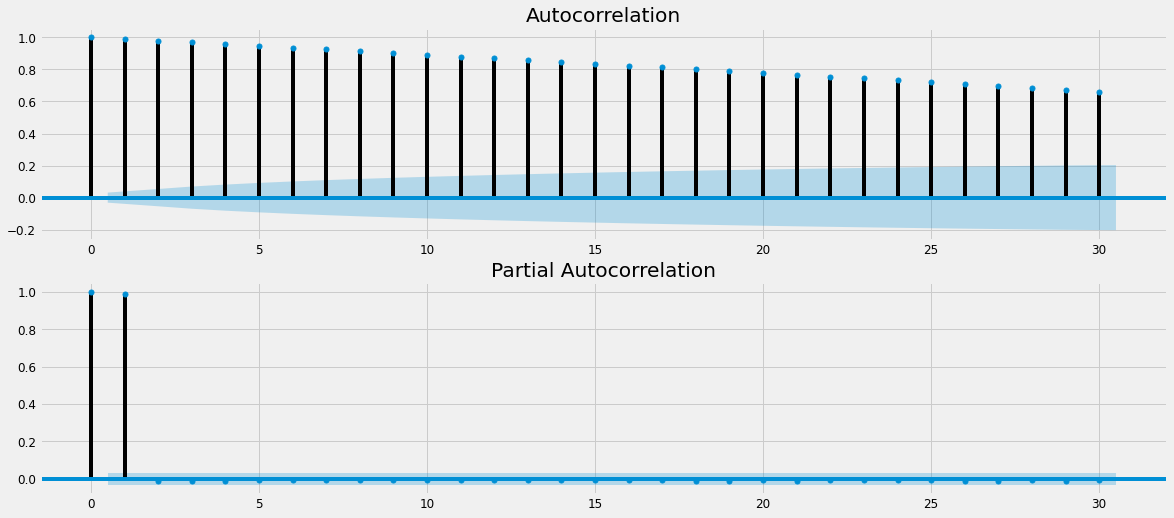

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


pyplot.figure()
pyplot.subplot(211)
plot_acf(y.avgtemp, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.avgtemp, ax=pyplot.gca(), lags = 30)
pyplot.show()

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.avghumid, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.avghumid, ax=pyplot.gca(), lags = 30)
pyplot.show()

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.avgdew, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.avgdew, ax=pyplot.gca(), lags = 30)
pyplot.show()

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.augbaro, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.augbaro, ax=pyplot.gca(), lags = 30)
pyplot.show()

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.augwind, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.augwind, ax=pyplot.gca(), lags = 30)
pyplot.show()

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.avggust, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.avggust, ax=pyplot.gca(), lags = 30)
pyplot.show()


pyplot.figure()
pyplot.subplot(211)
plot_acf(y.avgdir, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.avgdir, ax=pyplot.gca(), lags = 30)
pyplot.show()


pyplot.figure()
pyplot.subplot(211)
plot_acf(y.rfm, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.rfm, ax=pyplot.gca(), lags = 30)
pyplot.show()


pyplot.figure()
pyplot.subplot(211)
plot_acf(y.rfy, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.rfy, ax=pyplot.gca(), lags = 30)
pyplot.show()


Reviewing plots of the density of observations can provide further insight into the structure of the data:

The distribution is not perfectly Gaussian (normal distribution).
The distribution is left shifted.
Transformations might be useful prior to modelling.

In [33]:
from statsmodels.tsa.stattools import adfuller

In [36]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test Avg Temperature:')
dftest = adfuller(y.avgtemp, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test Avg Humidity:')
dftest = adfuller(y.avghumid, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test Avg DewPoint:')
dftest = adfuller(y.avgdew, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test Avg Windspeed:')
dftest = adfuller(y.augwind, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test Avg Barometer:')
dftest = adfuller(y.augbaro, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test Avg Gust speed:')
dftest = adfuller(y.avggust, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test Avg rainfall of Month:')
dftest = adfuller(y.rfm, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test Rainfall of Year:')
dftest = adfuller(y.rfy, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test Avg Direction:')
dftest = adfuller(y.avgdir, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test Avg Temperature:
Test Statistic                   -4.512659
p-value                           0.000187
#Lags Used                       14.000000
Number of Observations Used    3887.000000
Critical Value (1%)              -3.432033
Critical Value (5%)              -2.862284
Critical Value (10%)             -2.567166
dtype: float64
Results of Dickey-Fuller Test Avg Humidity:
Test Statistic                -1.385205e+01
p-value                        6.975948e-26
#Lags Used                     1.100000e+01
Number of Observations Used    3.890000e+03
Critical Value (1%)           -3.432032e+00
Critical Value (5%)           -2.862283e+00
Critical Value (10%)          -2.567166e+00
dtype: float64
Results of Dickey-Fuller Test Avg DewPoint:
Test Statistic                   -4.192476
p-value                           0.000678
#Lags Used                       14.000000
Number of Observations Used    3887.000000
Critical Value (1%)              -3.432033
Critical Va

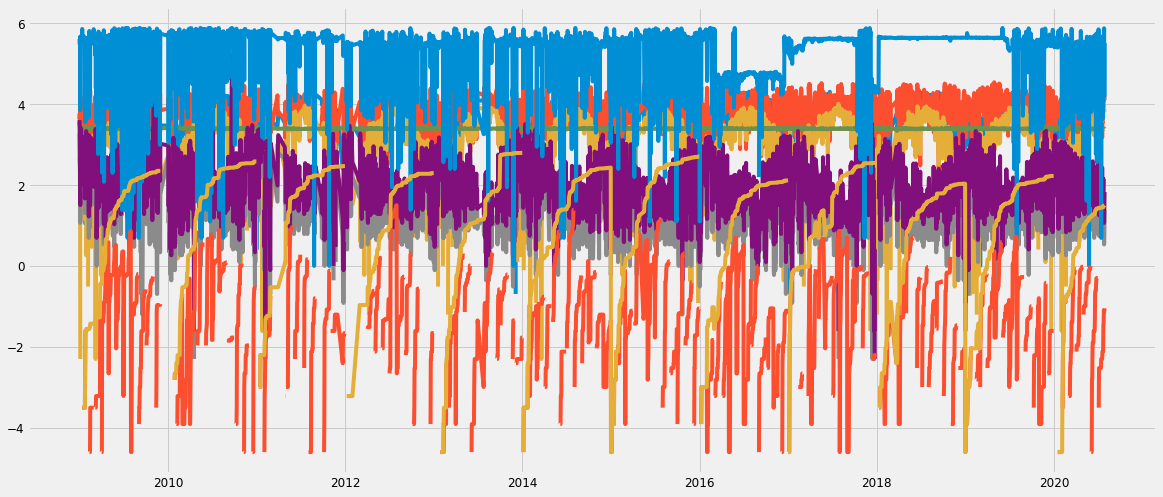

In [37]:
ts_log = np.log(y)
plt.plot(ts_log)

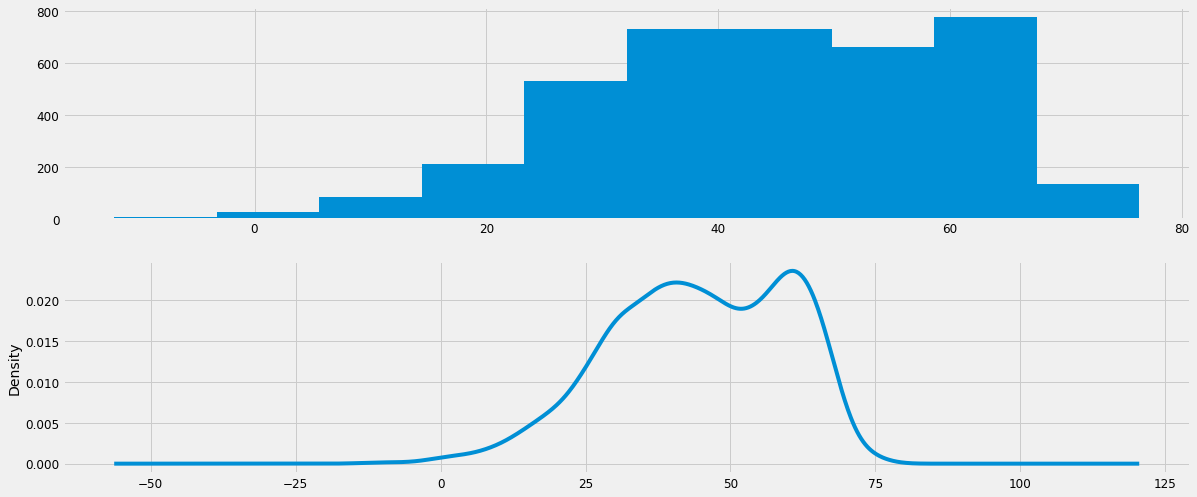

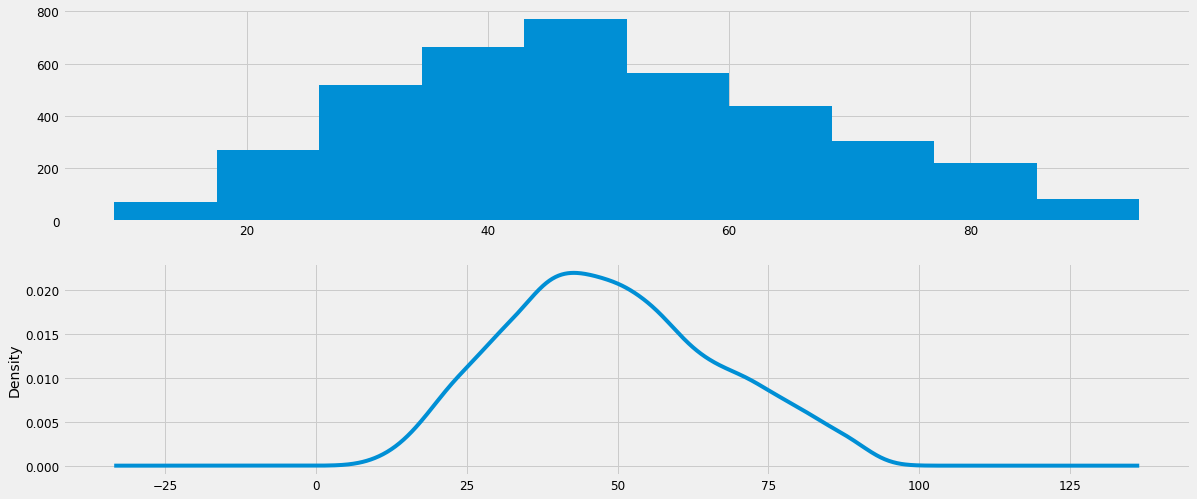

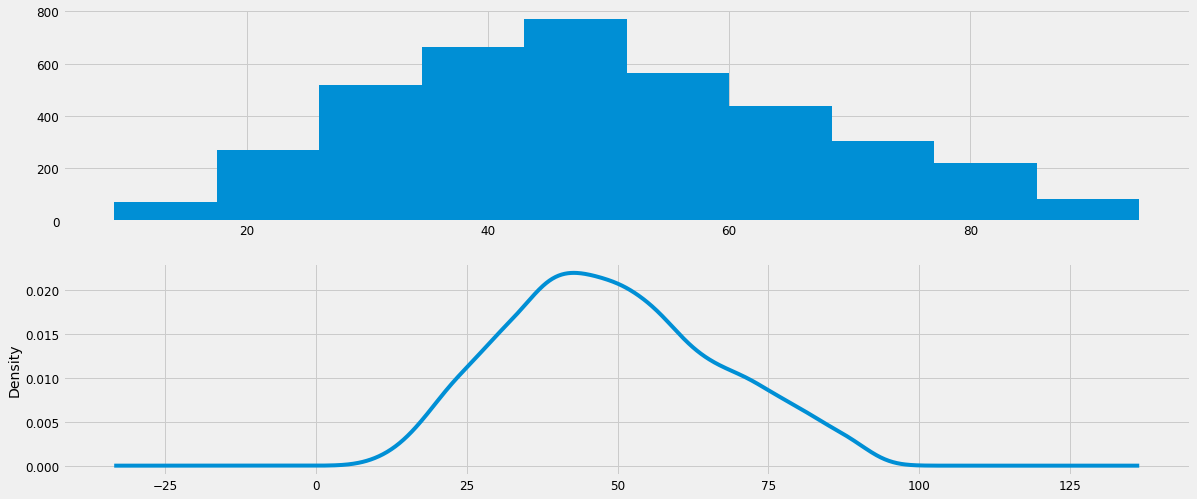

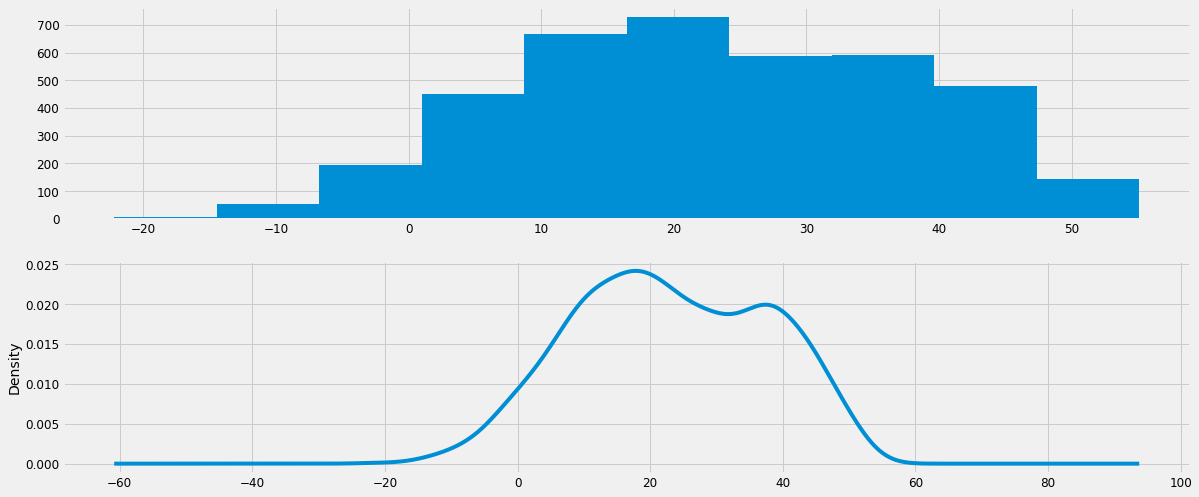

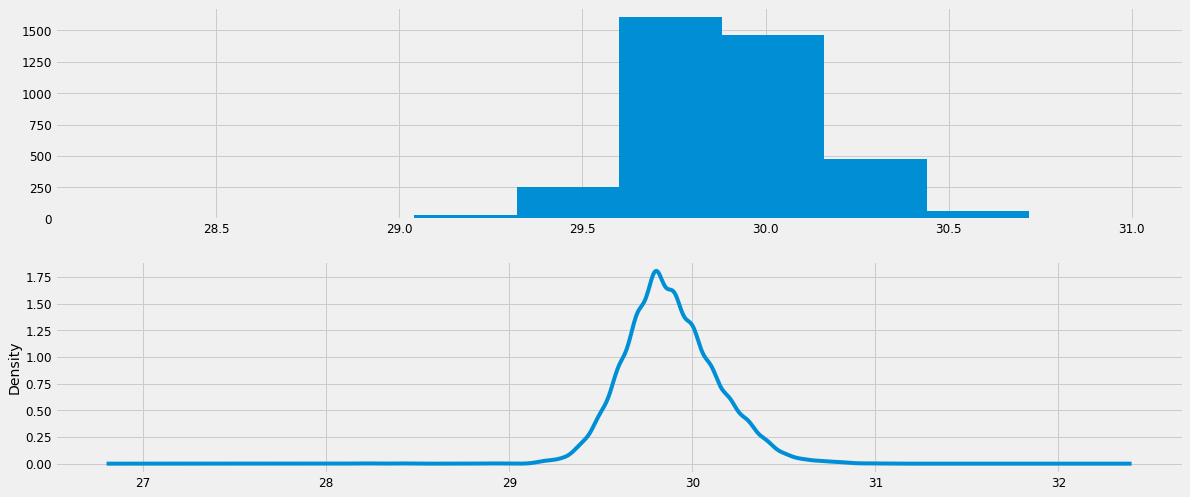

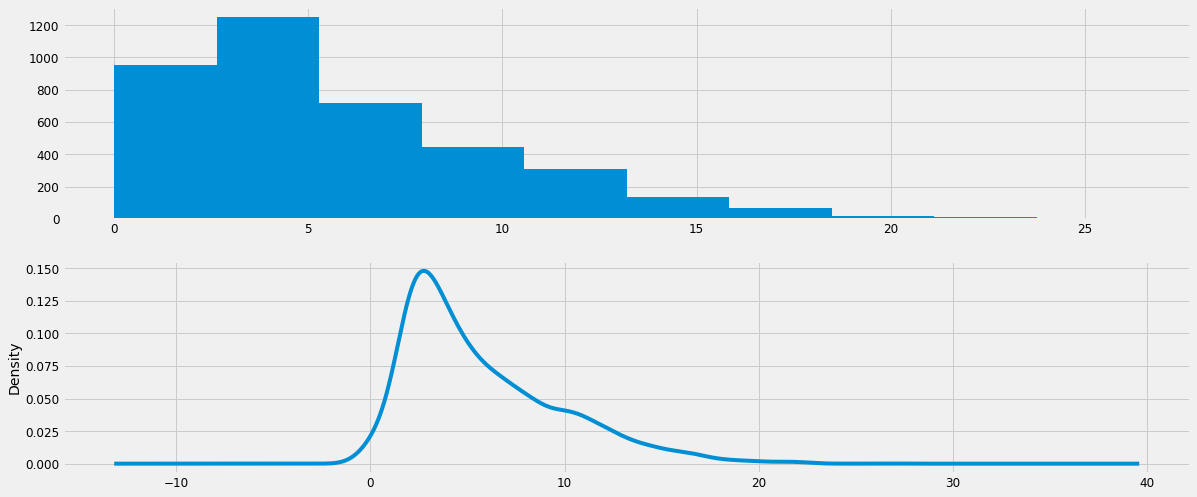

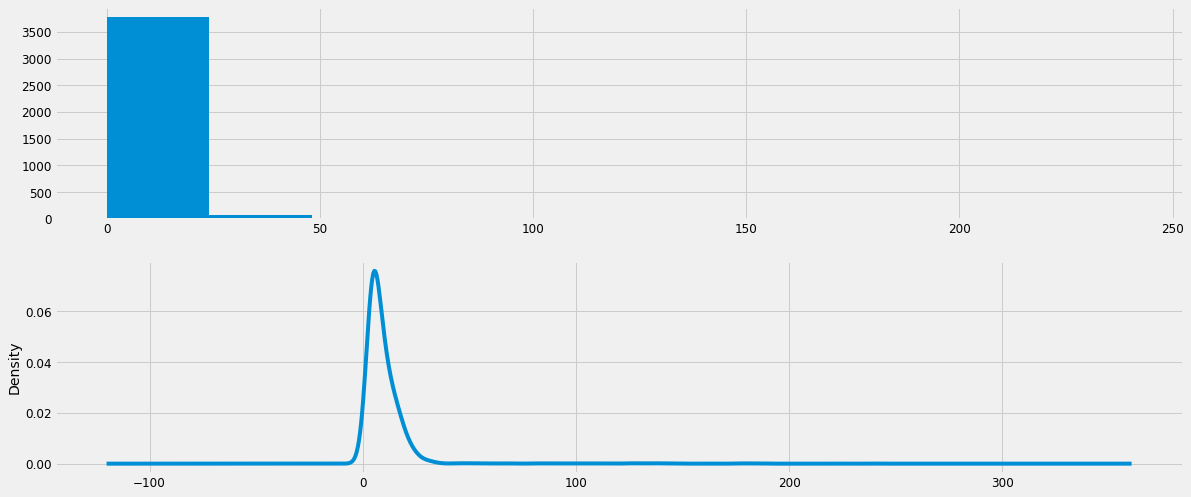

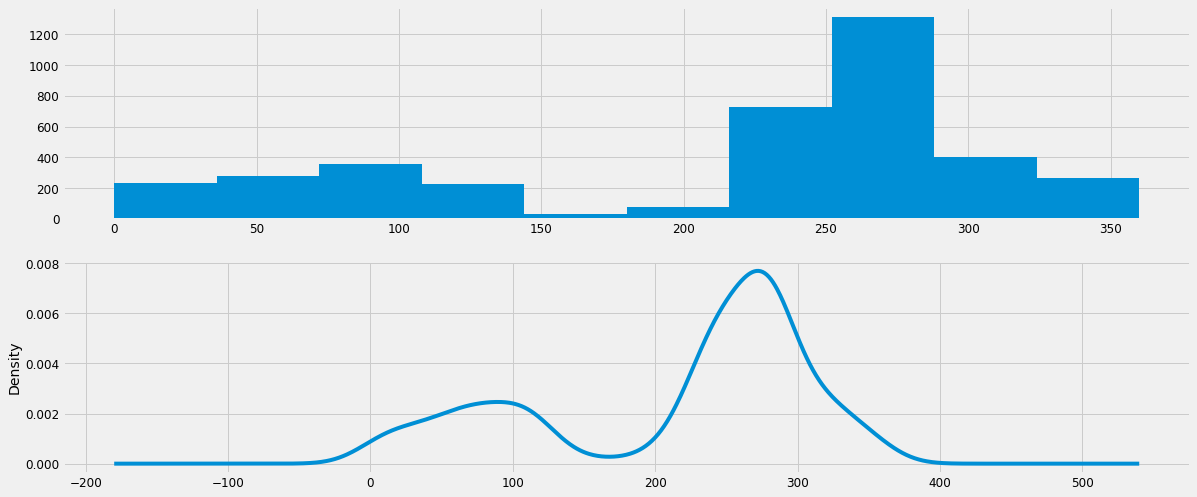

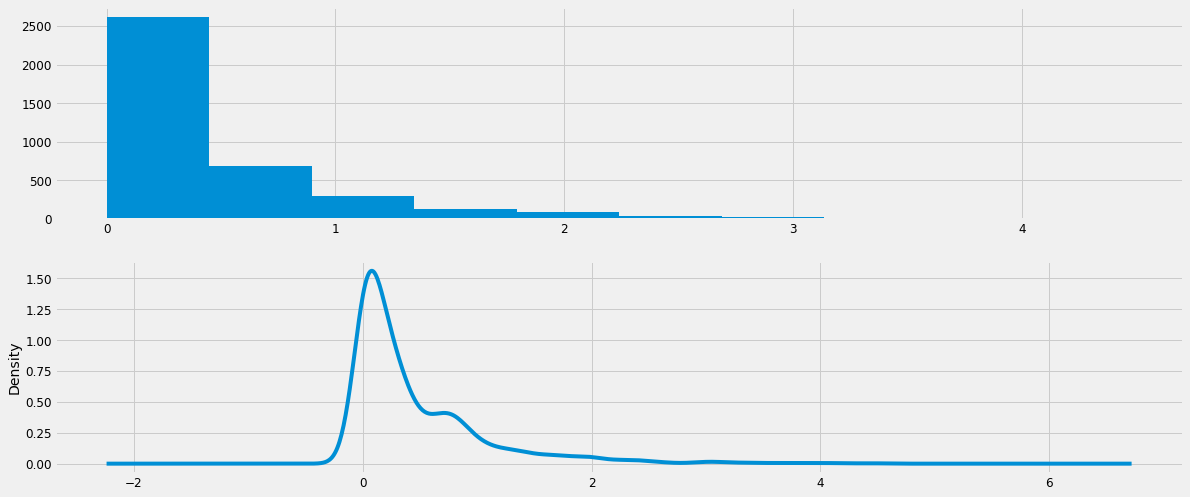

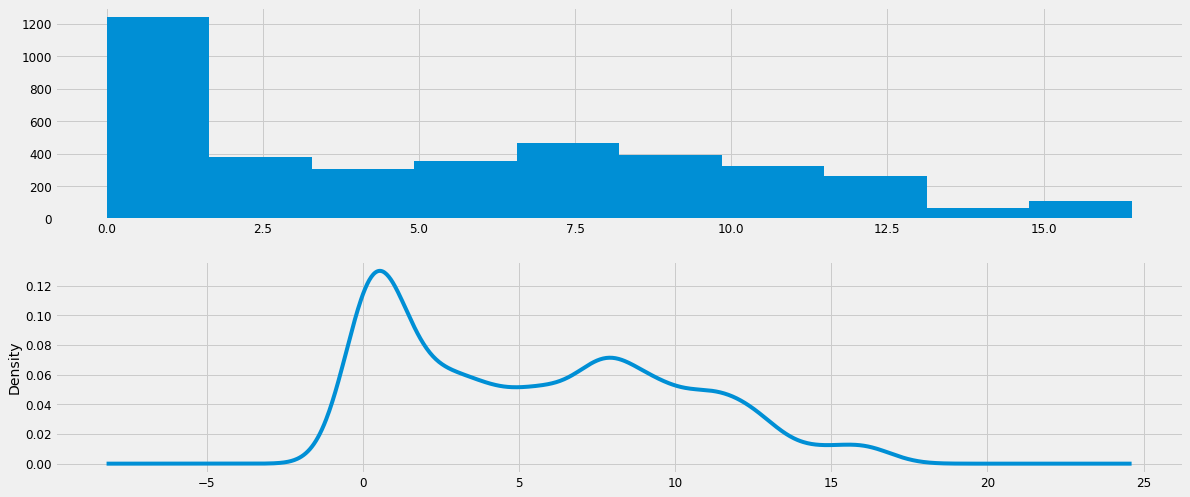

In [40]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
y.avgtemp.hist()
pyplot.subplot(212)
y.avgtemp.plot(kind='kde')
pyplot.show()

from pandas import Series
from matplotlib import pyplot
pyplot.figure(2)
pyplot.subplot(211)
y.avghumid.hist()
pyplot.subplot(212)
y.avghumid.plot(kind='kde')
pyplot.show()

from pandas import Series
from matplotlib import pyplot
pyplot.figure(3)
pyplot.subplot(211)
y.avghumid.hist()
pyplot.subplot(212)
y.avghumid.plot(kind='kde')
pyplot.show()

from pandas import Series
from matplotlib import pyplot
pyplot.figure(4)
pyplot.subplot(211)
y.avgdew.hist()
pyplot.subplot(212)
y.avgdew.plot(kind='kde')
pyplot.show()

from pandas import Series
from matplotlib import pyplot
pyplot.figure(4)
pyplot.subplot(211)
y.augbaro.hist()
pyplot.subplot(212)
y.augbaro.plot(kind='kde')
pyplot.show()

from pandas import Series
from matplotlib import pyplot
pyplot.figure(4)
pyplot.subplot(211)
y.augwind.hist()
pyplot.subplot(212)
y.augwind.plot(kind='kde')
pyplot.show()


from pandas import Series
from matplotlib import pyplot
pyplot.figure(7)
pyplot.subplot(211)
y.avggust.hist()
pyplot.subplot(212)
y.avggust.plot(kind='kde')
pyplot.show()

from pandas import Series
from matplotlib import pyplot
pyplot.figure(8)
pyplot.subplot(211)
y.avgdir.hist()
pyplot.subplot(212)
y.avgdir.plot(kind='kde')
pyplot.show()

from pandas import Series
from matplotlib import pyplot
pyplot.figure(9)
pyplot.subplot(211)
y.rfm.hist()
pyplot.subplot(212)
y.rfm.plot(kind='kde')
pyplot.show()

from pandas import Series
from matplotlib import pyplot
pyplot.figure(10)
pyplot.subplot(211)
y.rfy.hist()
pyplot.subplot(212)
y.rfy.plot(kind='kde')
pyplot.show()

Autoregression (AR)
The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.
Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

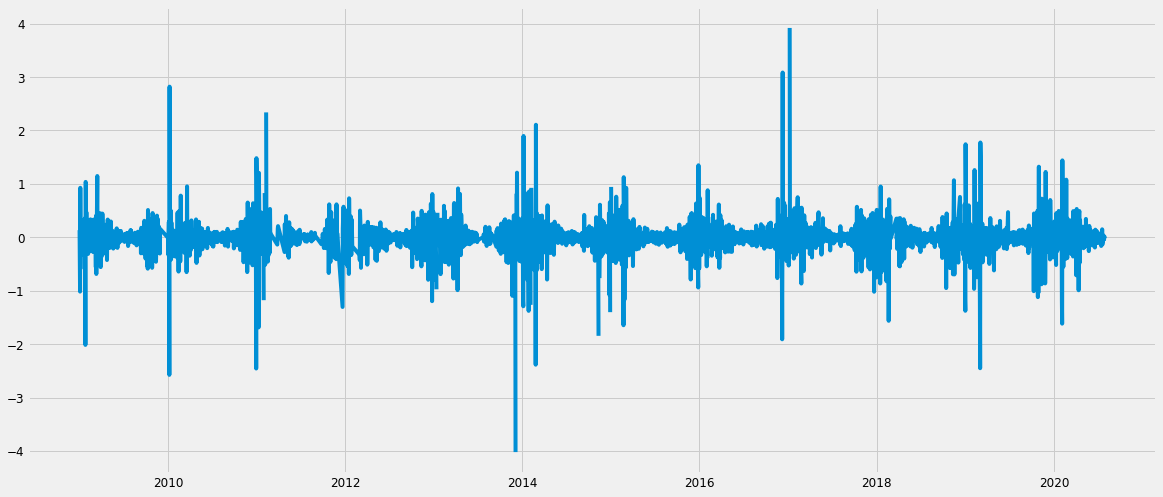

In [50]:
ts_log_diff = ts_log.avgtemp - ts_log.avgtemp.shift()
plt.plot(ts_log_diff)

In [52]:
from statsmodels.tsa.ar_model import AR
from random import random

In [54]:
# fit model
model = AR(ts_log_diff)
model_fit = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


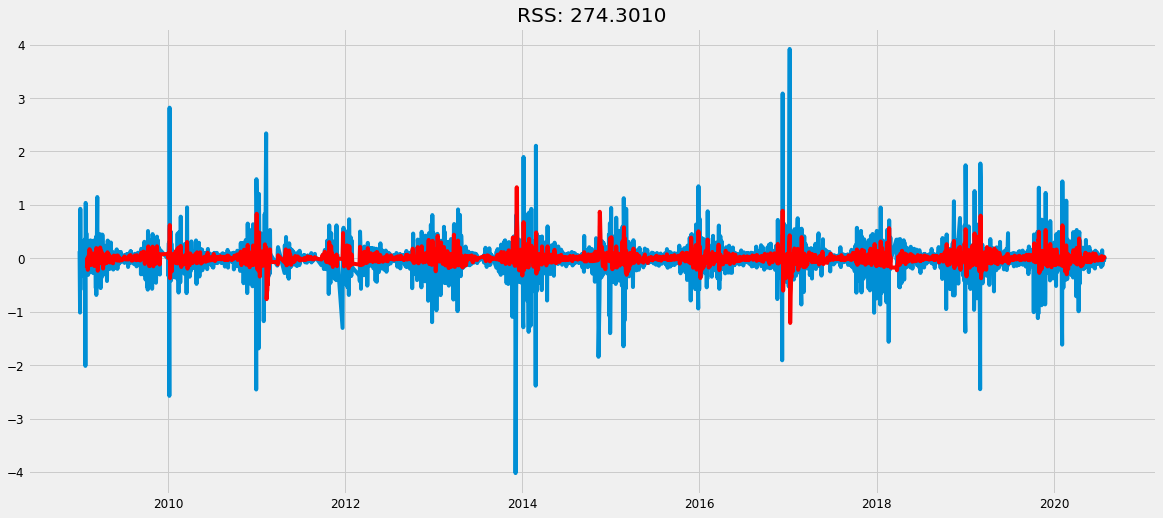

In [55]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.show()

In [56]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
2009-02-01   -0.178361
2009-02-02   -0.117215
2009-02-03    0.001437
2009-02-04   -0.157064
2009-02-05   -0.215319
dtype: float64


In [57]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2009-02-01   -0.178361
2009-02-02   -0.295575
2009-02-03   -0.294138
2009-02-04   -0.451202
2009-02-05   -0.666521
dtype: float64


In [58]:
predictions_ARIMA_log = pd.Series(ts_log.avgtemp.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2009-01-01    3.632309
2009-01-02    3.632309
2009-01-03    3.632309
2009-01-04    3.632309
2009-01-05    3.632309
dtype: float64

In [59]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 13752.1243')

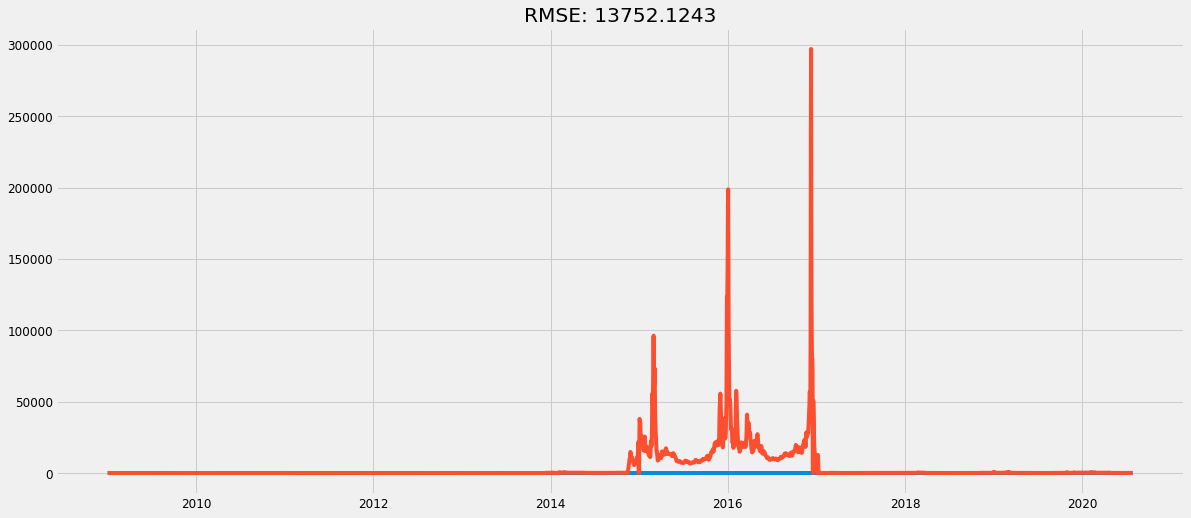

In [60]:
plt.plot(y.avgtemp)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA-y.avgtemp)**2)/len(y.avgtemp)))

Forecast quality scoring metrics
R squared
Mean Absolute Error
Median Absolute Error
Mean Squared Error
Mean Squared Logarithmic Error
Mean Absolute Percentage Error

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [62]:
r2_score(y.avgtemp, predictions_ARIMA)

-805281.5945428086

In [63]:
mean_absolute_error(y.avgtemp, predictions_ARIMA)

4024.0082490488435

In [65]:
median_absolute_error(y.avgtemp, predictions_ARIMA)

55.86519286899113

In [66]:
mean_squared_error(y.avgtemp, predictions_ARIMA)

189120922.2922697

In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y.avgtemp, predictions_ARIMA)

16528.726802848552

Function to evaluate forecast using above metrics:

In [72]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [73]:
evaluate_forecast(y.avgtemp, predictions_ARIMA)

,r2_score,mean_absolute_error,median_absolute_error,mse,mape,rmse
0,-805281.594543,4024.008249,55.865193,1.891209e+08,16528.726803,13752.124283


Moving Average (MA)
Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

In [74]:
# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(ts_log_diff, order=(0, 1))
model_fit = model.fit(disp=False)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [75]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                avgtemp   No. Observations:                 3878
Model:                     ARMA(0, 1)   Log Likelihood                -718.614
Method:                       css-mle   S.D. of innovations              0.291
Date:                Fri, 16 Apr 2021   AIC                           1443.228
Time:                        01:43:19   BIC                           1462.018
Sample:                             0   HQIC                          1449.899
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.004      0.054      0.957      -0.008       0.009
ma.L1.avgtemp    -0.0943      0.025     -3.708      0.000      -0.144      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           10.6076           +0.0000j           10.6076            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 328.9174')

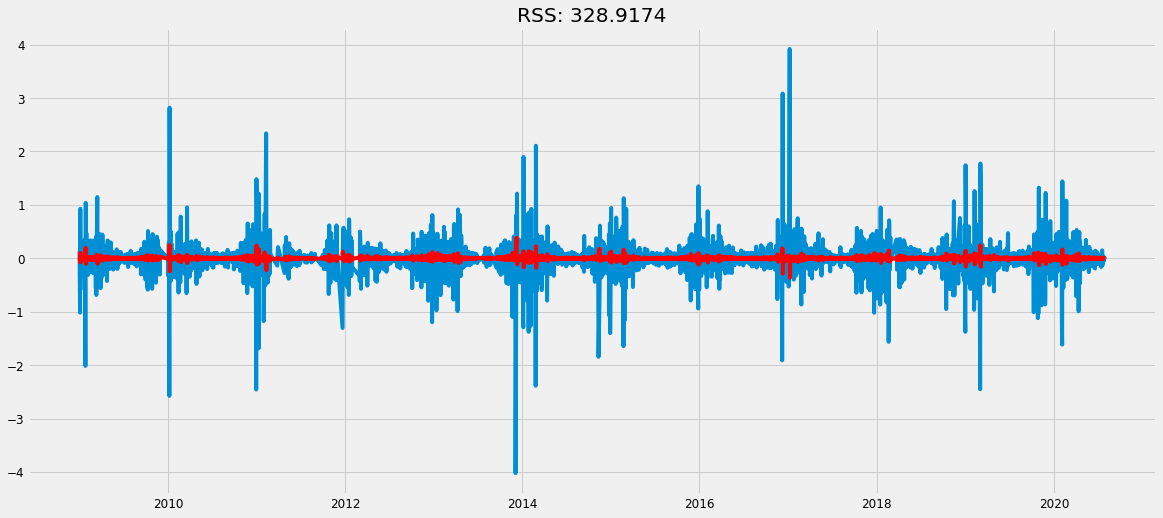

In [76]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

Autoregressive Moving Average (ARMA)
Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

In [77]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(ts_log_diff, order=(2, 1))
model_fit = model.fit(disp=False)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [78]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                avgtemp   No. Observations:                 3878
Model:                     ARMA(2, 1)   Log Likelihood                -449.174
Method:                       css-mle   S.D. of innovations              0.272
Date:                Fri, 16 Apr 2021   AIC                            908.349
Time:                        01:44:47   BIC                            939.664
Sample:                             0   HQIC                           919.467
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.002      0.199      0.842      -0.003       0.003
ar.L1.avgtemp     0.6397      0.023     28.285      0.000       0.595       0.684
ar.L2.avgtemp    -0.2165      0.017    -12.453      0.000      -0.251      -0.182
ma.L1.avgtemp    -0.7940      0.018    -42.999      0.000      -0.830      -0.758
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4770           -1.5609j            2.1490           -0.1294
AR.2            1.4770           +1.5609j            2.1490            0.1294
MA.1            1.2595           +0.0000j            1.2595            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 286.3537')

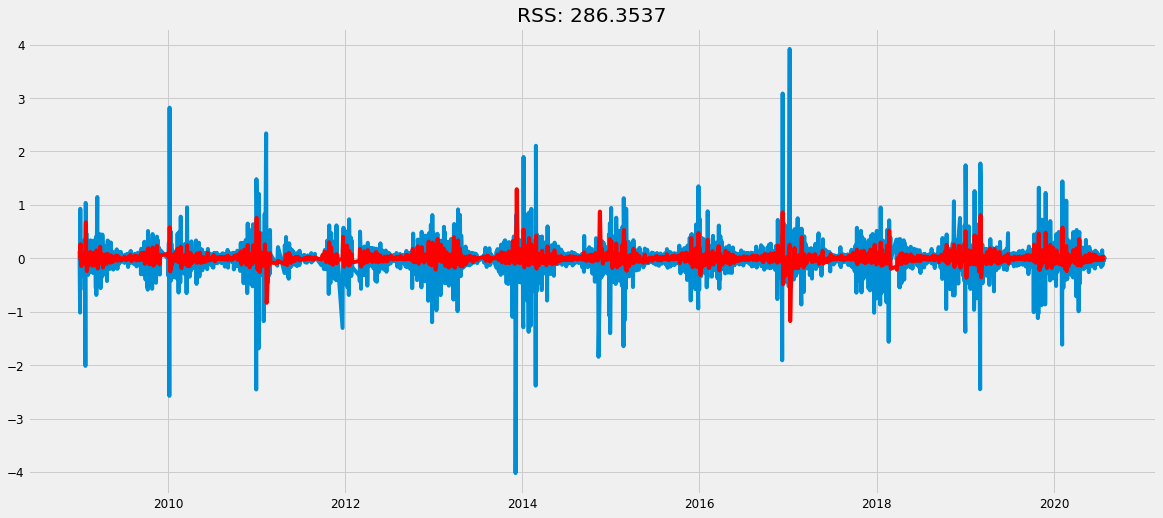

In [79]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

Autoregressive Integrated Moving Average (ARIMA)
In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of Differences (d): d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

In [80]:
ts = y.avgtemp - y.avgtemp.shift()
ts.dropna(inplace=True)

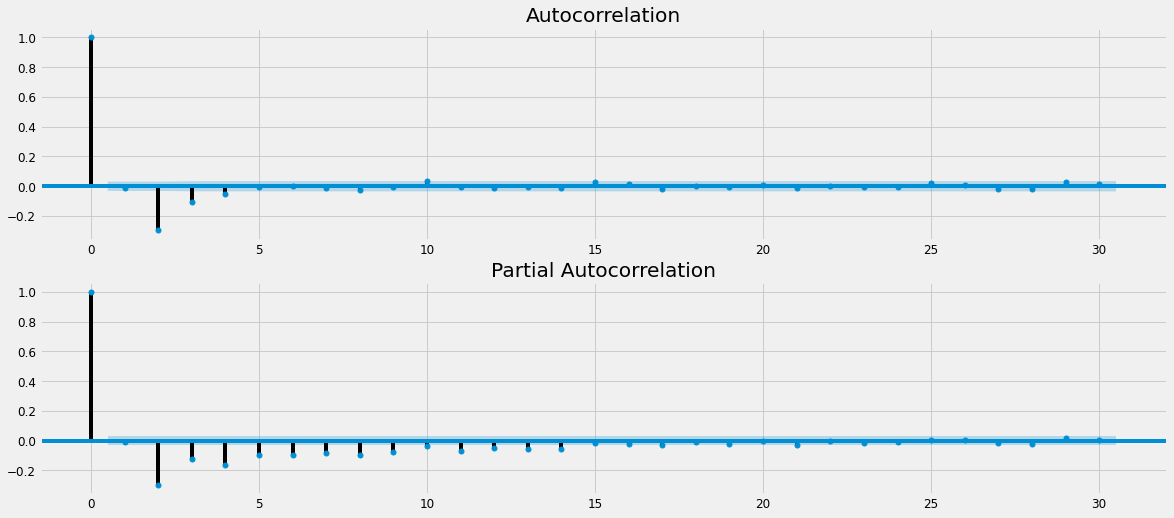

In [81]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(ts, ax=pyplot.gca(),lags=30)
pyplot.show()

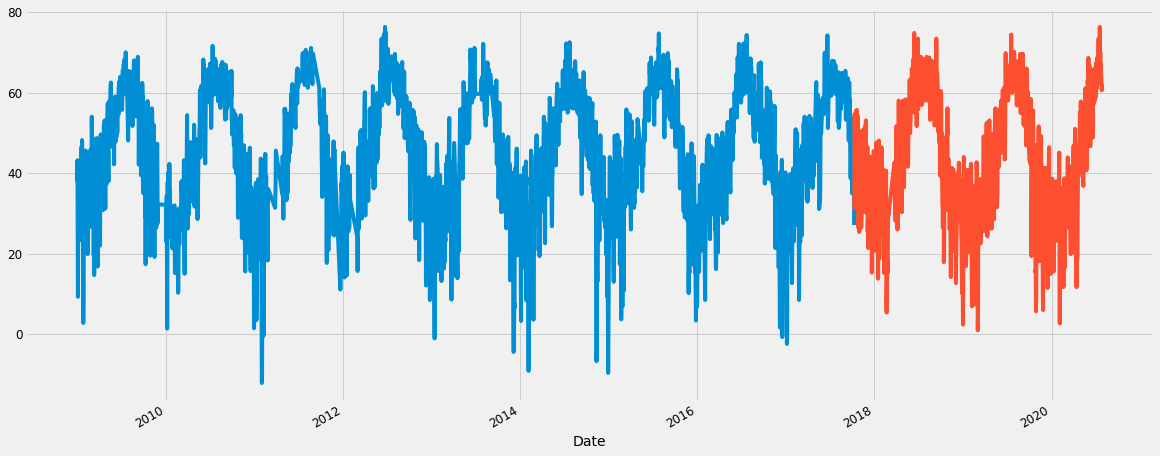

In [82]:
#divide into train and validation set
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]

#plotting the data
train['avgtemp'].plot()
valid['avgtemp'].plot()

In [100]:
train.head()

,avgtemp,avghumid,avgdew,augbaro,augwind,avggust,avgdir,rfm,rfy
Date,,,,,,,,,
2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0
2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0
2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0
2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0
2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0


In [101]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.avgtemp.values

In [102]:
train_prophet.head()

,ds,y
0,2009-01-01,37.8
1,2009-01-02,43.2
2,2009-01-03,25.7
3,2009-01-04,9.3
4,2009-01-05,23.5


In [103]:
from fbprophet import Prophet

#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet( yearly_seasonality=True, seasonality_mode = 'multiplicative')
model.fit(train_prophet) #fit the model with your dataframe

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 36, freq = 'MS') 
future.tail()

,ds
2957,2020-06-01
2958,2020-07-01
2959,2020-08-01
2960,2020-09-01
2961,2020-10-01


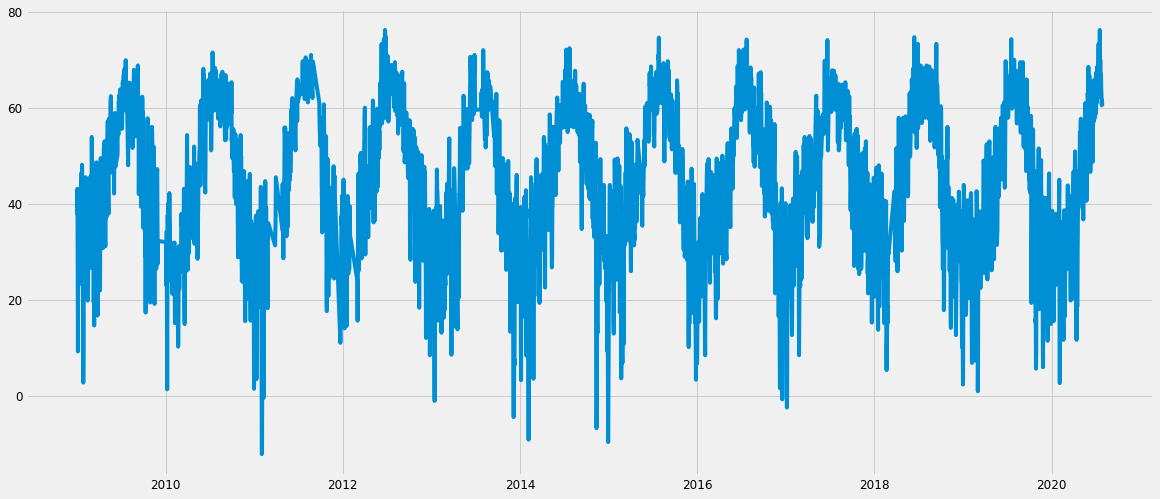

In [107]:
forecast = model.predict()
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y.avgtemp, label='Train')
#plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [108]:
forecast.columns

Index(['Prediction'], dtype='object')

In [109]:
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2957,2020-06-01,55.471469,44.743765,65.462565
2958,2020-07-01,64.324959,52.729146,74.843862
2959,2020-08-01,64.730938,54.729345,76.290914
2960,2020-09-01,61.267738,50.747304,71.612124
2961,2020-10-01,49.836674,39.109414,60.440860


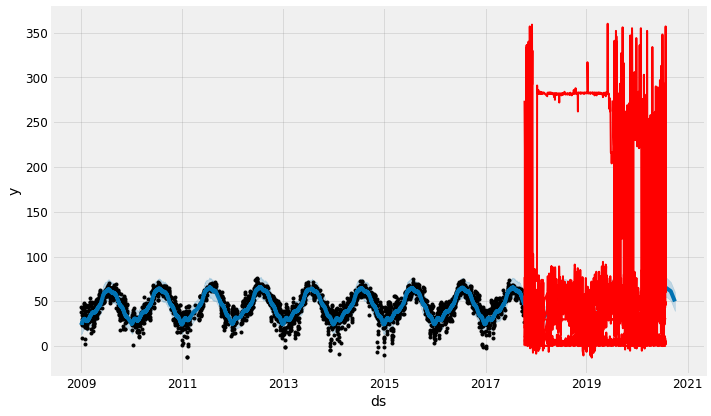

In [110]:
fig = model.plot(forecast)
#plot the predictions for validation set

plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

plt.show()

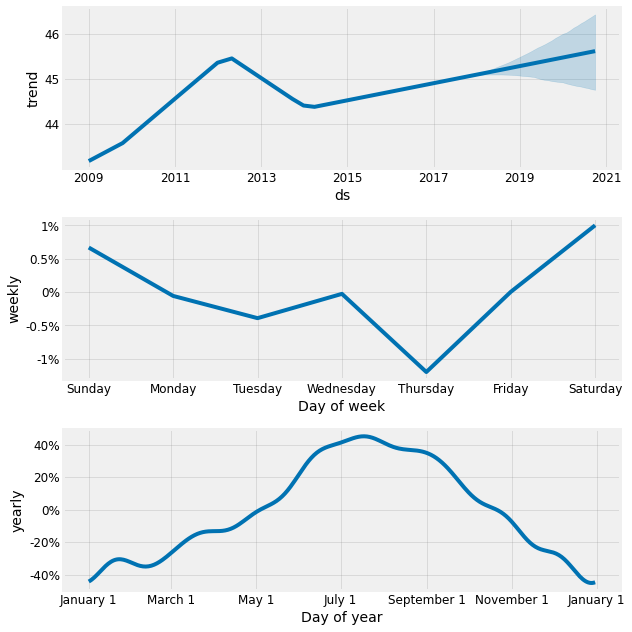

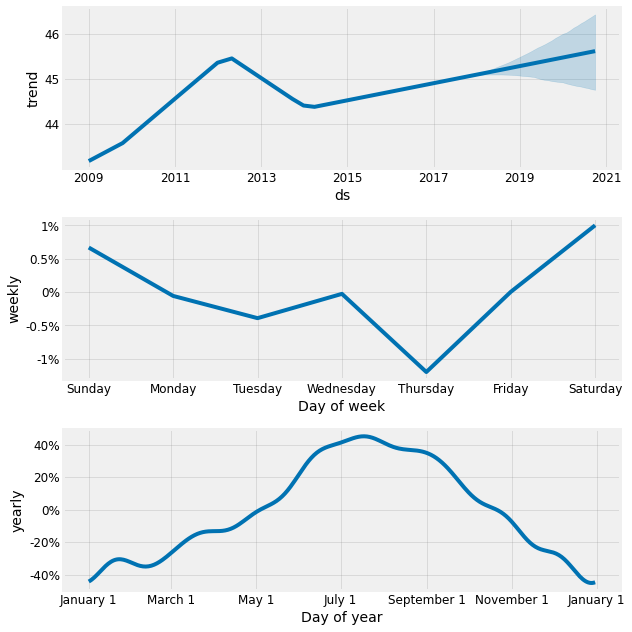

In [111]:
model.plot_components(forecast)

In [112]:
y_prophet = pd.DataFrame()
y_prophet['ds'] = y.index
y_prophet['y'] = y.avgtemp.values

In [113]:
y_prophet = y_prophet.set_index('ds')
forecast_prophet = forecast.set_index('ds')

In [117]:
evaluate_forecast(y_prophet.y[1:500], forecast_prophet.yhat[1:500])

,r2_score,mean_absolute_error,median_absolute_error,mse,mape,rmse
0,0.657629,6.221309,4.887246,65.994489,24.08601,8.123699
